In [1]:
import tensorflow as tf
from keras_preprocessing.image import load_img, img_to_array, array_to_img 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
def predict(path,model_weight) :
    """Parameter:
    path= images path 
    model_weight = path to file of train neural network weight
    """
    img = tf.keras.preprocessing.image.load_img(path, target_size=(224,224), interpolation='lanczos')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255.0
    model = tf.keras.models.load_model(model_weight)
    labels_inv = {'Cargo': 0,
              'Military': 1,
              'Carrier': 2,
              'Cruise': 3,
              'Tankers': 4}
    labels = {v:k for k,v in labels_inv.items()}
    labels
    pred = model.predict(np.array([img]))
    plt.imshow(img)
    pred_label = np.argsort(pred)
    for i in pred_label[0][-1:-6:-1] :
        print(f"{labels[i]} Ship : {pred[0][i]*100:0.2f} %")

1/1 [==============================] - 4s 4s/step
Carrier Ship : 83.37 %
Cruise Ship : 11.52 %
Cargo Ship : 2.99 %
Military Ship : 1.35 %
Tankers Ship : 0.77 %


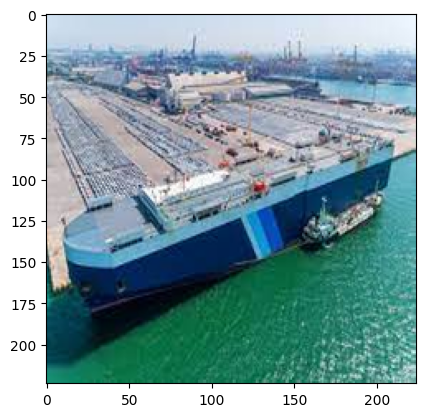

In [4]:
predict("../input/download/roll roll.jpeg",'./model_VGG16_2.h5') 

1/1 [==============================] - 0s 189ms/step
Military Ship : 99.96 %
Cruise Ship : 0.02 %
Tankers Ship : 0.01 %
Cargo Ship : 0.01 %
Carrier Ship : 0.00 %


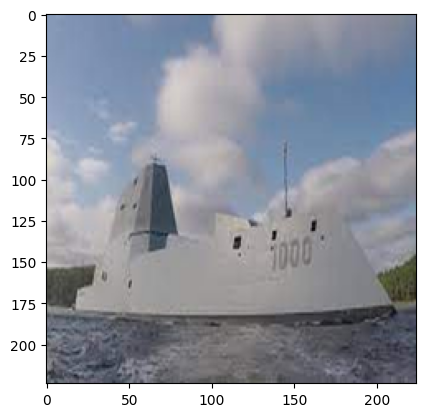

In [6]:
predict("../input/download/zumwalt.jpeg",'./model_VGG16_2.h5') 

1/1 [==============================] - 0s 121ms/step
Military Ship : 54.73 %
Carrier Ship : 44.76 %
Tankers Ship : 0.22 %
Cruise Ship : 0.15 %
Cargo Ship : 0.14 %


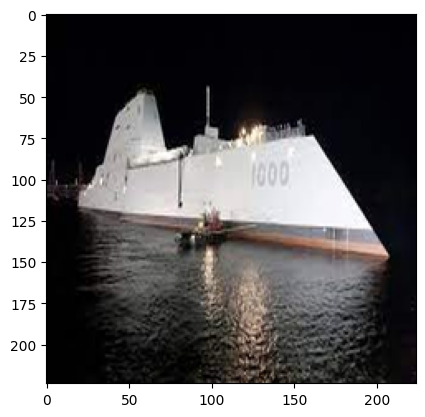

In [7]:
predict("../input/download/zumwalt2.jpeg",'./model_VGG16_2.h5') 

1/1 [==============================] - 0s 99ms/step
Cargo Ship : 99.66 %
Tankers Ship : 0.32 %
Military Ship : 0.01 %
Cruise Ship : 0.00 %
Carrier Ship : 0.00 %


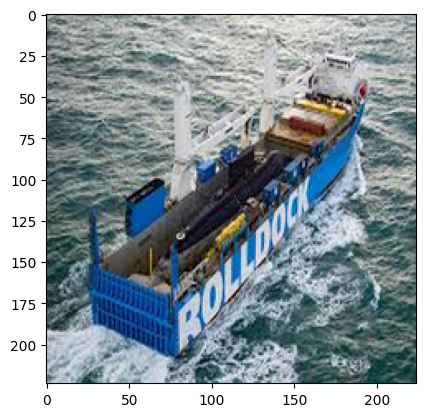

In [8]:
predict("../input/download/roll roll2.jpeg",'./model_VGG16_2.h5') 

1/1 [==============================] - 0s 102ms/step
Tankers Ship : 90.85 %
Cargo Ship : 8.97 %
Military Ship : 0.13 %
Cruise Ship : 0.04 %
Carrier Ship : 0.01 %


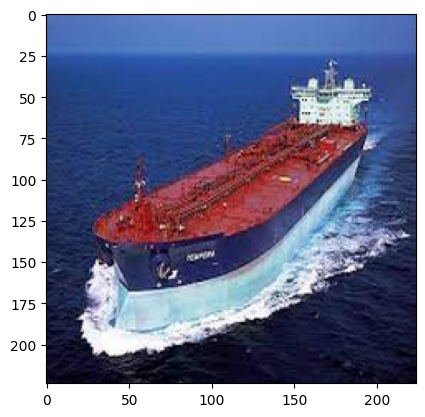

In [9]:
predict("../input/download/tanker.jpeg",'./model_VGG16_2.h5') 

1/1 [==============================] - 0s 96ms/step
Cruise Ship : 85.64 %
Military Ship : 12.84 %
Cargo Ship : 1.48 %
Carrier Ship : 0.02 %
Tankers Ship : 0.01 %


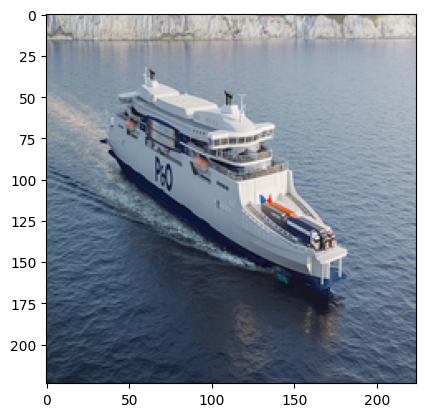

In [10]:
predict("../input/download/ferry.jpg",'./model_VGG16_2.h5') 

1/1 [==============================] - 0s 107ms/step
Cargo Ship : 91.40 %
Tankers Ship : 8.59 %
Carrier Ship : 0.00 %
Cruise Ship : 0.00 %
Military Ship : 0.00 %


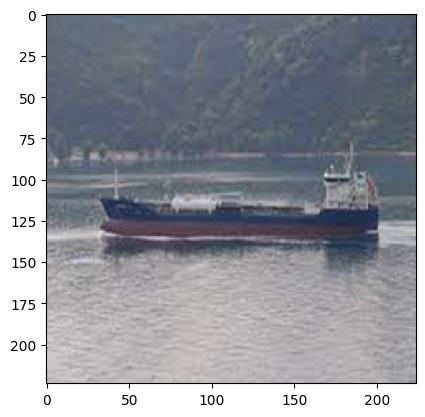

In [11]:
predict("../input/download/mckeil.jpeg",'./model_VGG16_2.h5') 

1/1 [==============================] - 0s 101ms/step
Military Ship : 99.73 %
Cruise Ship : 0.19 %
Tankers Ship : 0.06 %
Cargo Ship : 0.02 %
Carrier Ship : 0.00 %


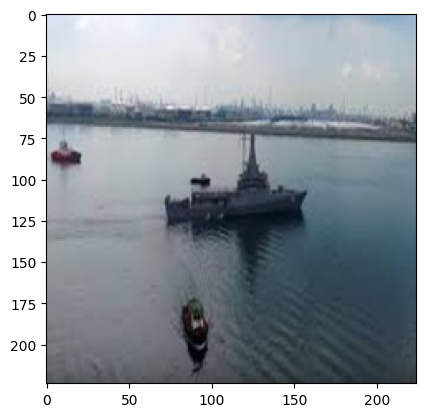

In [12]:
predict("../input/download/lmv.jpeg",'./model_VGG16_2.h5') 

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from tensorflow.keras.applications import imagenet_utils

def predict_url(url,model_weight):
    # URL of the image
    image_url =url
    # Fetch the image from the web
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))

    # Preprocess the image
    image = image.resize((224, 224))  # Resize the image to match the model's input size
    img = np.array(image)
    model = tf.keras.models.load_model(model_weight)


    pred = model.predict(np.array([img]))
    plt.imshow(img)
    pred_label = np.argsort(pred)
    for i in pred_label[0][-1:-6:-1] :
        print(f"{labels[i]} Ship : {pred[0][i]*100:0.2f} %")

In [ ]:
predict_url('https://upload.wikimedia.org/wikipedia/commons/4/4a/RSS_Fortitude_in_2018.jpg','./model_VGG16_3.h5')